In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

In [ ]:
# Loading
file = '../fakedata.csv' # Update later
df = pd.read_csv(file)
df = df[['Time Period','UserID','Date','Value 1']]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Value 1'])
df = df.sort_values(by='Date')

dates = df['Date']
observations = df['Value 1'].values

In [ ]:
# Kalman Filtering
kf = KalmanFilter(initial_state_mean=observations[0], 
                  n_dim_obs=1, 
                  transition_matrices=[1], 
                  observation_matrices=[1], 
                  initial_state_covariance=1, 
                  transition_covariance=0.01, 
                  observation_covariance=1)

# Application
state_means, state_covariances = kf.filter(observations.reshape(-1, 1))

# Compute residuals
residuals = observations - state_means.flatten()
thresh = 2 * np.std(residuals)  # Define drift threshold

drift_indices = np.where(np.abs(residuals) > thresh)[0]

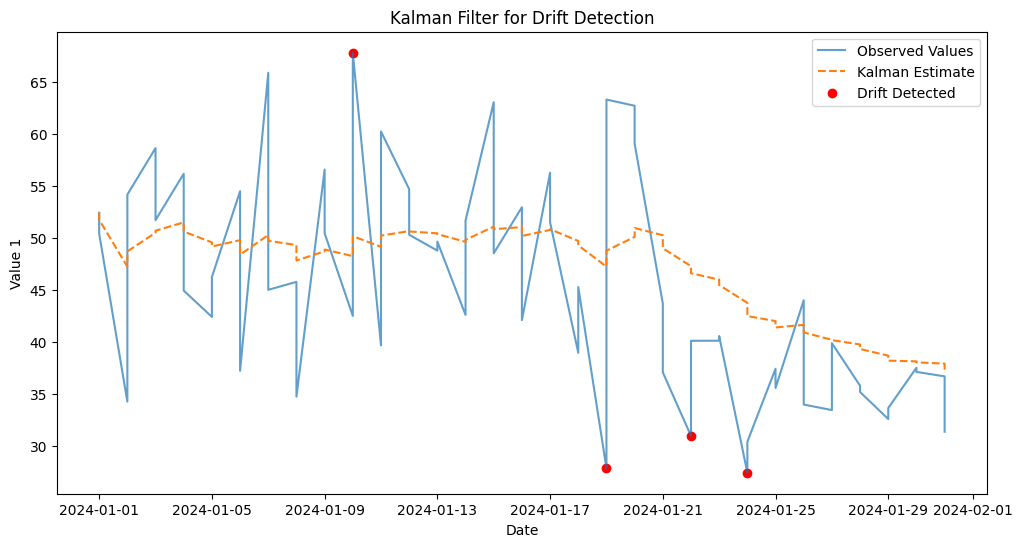

In [18]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(dates, observations, label='Observed Values', alpha=0.7)
plt.plot(dates, state_means, label='Kalman Estimate', linestyle='dashed')
plt.scatter(dates.iloc[drift_indices], observations[drift_indices], color='red', label='Drift Detected')
plt.xlabel('Date')
plt.ylabel('Value 1')
plt.title('Kalman Filter for Drift Detection')
plt.legend()
plt.show()